In [2]:
import pandas as pd
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [3]:
movie_file = Path("final_1688.csv")

movie_df = pd.read_csv(movie_file)
movie_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations
0,Inception,825532764,160000000,665532764,Action,148.0,2010.0,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74.0,87%,159.0,220.0
1,Interstellar,701729206,165000000,536729206,Adventure,169.0,2014.0,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74.0,73%,0.0,0.0
2,The Dark Knight,1004558444,185000000,819558444,Action,152.0,2008.0,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84.0,94%,163.0,164.0
3,Avatar,2923706026,237000000,2686706026,Action,162.0,2009.0,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83.0,82%,91.0,131.0
4,The Avengers,1518815515,220000000,1298815515,Action,143.0,2012.0,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69.0,91%,39.0,81.0


## Actor Analysis

In [4]:
Actors_df = movie_df.copy()

In [5]:
lead_actor = Actors_df[['Lead actor', 'Cast']] = Actors_df['Actors_O'].str.split(',', n=1, expand=True)

lead_actor.head()

,0,1
0,Leonardo DiCaprio,"Joseph Gordon-Levitt, Elliot Page"
1,Matthew McConaughey,"Anne Hathaway, Jessica Chastain"
2,Christian Bale,"Heath Ledger, Aaron Eckhart"
3,Sam Worthington,"Zoe Saldana, Sigourney Weaver"
4,Robert Downey Jr.,"Chris Evans, Scarlett Johansson"


In [6]:
Actors_df['Lead actor'].nunique

<bound method IndexOpsMixin.nunique of 0         Leonardo DiCaprio
1       Matthew McConaughey
2            Christian Bale
3           Sam Worthington
4         Robert Downey Jr.
               ...         
1683        Andrew Garfield
1684        Joaquin Phoenix
1685         Jerry Seinfeld
1686           Heath Ledger
1687             Mike Myers
Name: Lead actor, Length: 1688, dtype: object>

### Actors with most amounts of movies

In [7]:
number_of_unique_cast = len(pd.unique(Actors_df['Lead actor']))
number_of_unique_cast

628

In [8]:
actors_most_movies = Actors_df['Lead actor'].value_counts()

# top occuring actors

actors_most_movies.head()

Lead actor
Johnny Depp          23
Tom Hanks            22
Tom Cruise           22
Leonardo DiCaprio    19
Denzel Washington    19
Name: count, dtype: int64

In [9]:
actors_most_movies.iloc[30:40]

Lead actor
Eddie Murphy          9
Mike Myers            9
Will Ferrell          9
Tom Hardy             9
Harrison Ford         9
Ryan Reynolds         8
Scarlett Johansson    8
Robin Williams        8
Cameron Diaz          8
Joaquin Phoenix       8
Name: count, dtype: int64

In [10]:
# bins with ranges

popularity_bins = pd.cut(actors_most_movies, [0, 5, 10, 15, 20, 25], labels=['0-5', '5-10', '10-15', '15-20', '20-25'])
popularity_bins

Lead actor
Johnny Depp               20-25
Tom Hanks                 20-25
Tom Cruise                20-25
Leonardo DiCaprio         15-20
Denzel Washington         15-20
                          ...  
Steve Zahn                  0-5
Charlie Cox                 0-5
Elizabeth Olsen             0-5
Donnie Wahlberg             0-5
Philip Seymour Hoffman      0-5
Name: count, Length: 628, dtype: category
Categories (5, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25']

In [11]:
actors_df_bins = pd.DataFrame({'Lead Actor Count': actors_most_movies, 'Popularity Bins': popularity_bins})

# Merge the 'actors df bins' with 'actors_df' on the lead actor column
Actors_merged_df = pd.merge(Actors_df,actors_df_bins, left_on='Lead actor', right_index=True)

# Group the merged DataFrame by the 'Popularity Bins' and calculate the mean box office total for each bin
mean_box_office_per_bin = Actors_merged_df.groupby('Popularity Bins')['profit'].mean()/1_000_000

print(mean_box_office_per_bin)

Popularity Bins
0-5      148.539648
5-10     211.515725
10-15    212.476724
15-20    148.936630
20-25    257.187735
Name: profit, dtype: float64


/var/folders/jd/jl0dg_qj6xg4kq6zfpwmgt840000gn/T/ipykernel_1237/478352475.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_box_office_per_bin = Actors_merged_df.groupby('Popularity Bins')['profit'].mean()/1_000_000


### analysis charts

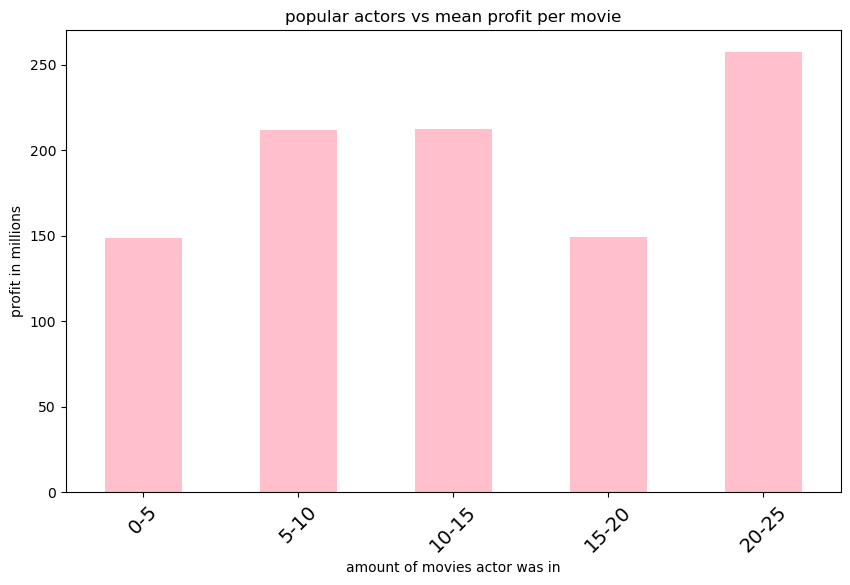

In [12]:
# popular actors vs the average profit per movie bar chart

mean_box_office_per_bin.plot(kind='bar', figsize=(10, 6), color='pink')

# Titles and labels
plt.title('popular actors vs mean profit per movie')
plt.xlabel('amount of movies actor was in')
plt.ylabel('profit in millions')
plt.xticks(fontsize=14, rotation = 45)  

plt.savefig('actor_movie_count_vs_profitpng')

plt.show()

### Analysis

the data shows that Movies by top actors make more money compared to movies by less popular actors. the popularity is determined by how many movies the actor starred in. although there are other cast members we chose to analyze the lead actor since its the first name that's read after the movie title and it would determine if people would pay to watch movies for that specific actor which in turn affects profit.


Actors who have been in more than 20 movies have more average profit per movies, but actors that have starred in less than 20 movies have varying profits
There is a threshold to actor popularity and the profit they make, after they have starred in 20 movies they seem to make more profit than usual actors. actor alone sometimes doesn't determine a movie's profit untill the top 3 out of 628 actors as shown in the data below.

analysis setbacks: not enough clean data to analyze
                   most of the movies relevant enough and available is in the action genre
                   


In [13]:
bin_counts = popularity_bins.value_counts()
bin_counts

count
0-5      559
5-10      41
10-15     16
15-20      9
20-25      3
Name: count, dtype: int64

In [14]:
def convert_to_float(x):
    try:
        if isinstance(x, (int, float)):
            return float(x)
        if isinstance(x, str):
            if '%' in x:
                return float(x.strip('%')) / 100  # Convert to decimal
            return float(x)
    except (ValueError, TypeError):
        return np.nan
    
Actors_df['Rotten_Tomato_O'] = Actors_df['Rotten_Tomato_O'].apply(convert_to_float)
print(Actors_df['Rotten_Tomato_O'])

0       0.87
1       0.73
2       0.94
3       0.82
4       0.91
        ... 
1683    0.83
1684    0.69
1685    0.50
1686    0.71
1687    0.88
Name: Rotten_Tomato_O, Length: 1688, dtype: float64


In [15]:
if Actors_df['Rotten_Tomato_O'].max() <= 1.0:
    Actors_df['Rotten_Tomato_O'] = (Actors_df['Rotten_Tomato_O'] * 100)

# Apply multiplication to 'Rating' if it hasn't been scaled up yet
if Actors_df['Rating'].max() <= 10:
    Actors_df['Rating'] = (Actors_df['Rating'] * 10)

Actors_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,Lead actor,Cast
0,Inception,825532764,160000000,665532764,Action,148.0,2010.0,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",88.0,74.0,87.0,159.0,220.0,Leonardo DiCaprio,"Joseph Gordon-Levitt, Elliot Page"
1,Interstellar,701729206,165000000,536729206,Adventure,169.0,2014.0,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",86.0,74.0,73.0,0.0,0.0,Matthew McConaughey,"Anne Hathaway, Jessica Chastain"
2,The Dark Knight,1004558444,185000000,819558444,Action,152.0,2008.0,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",90.0,84.0,94.0,163.0,164.0,Christian Bale,"Heath Ledger, Aaron Eckhart"
3,Avatar,2923706026,237000000,2686706026,Action,162.0,2009.0,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",78.0,83.0,82.0,91.0,131.0,Sam Worthington,"Zoe Saldana, Sigourney Weaver"
4,The Avengers,1518815515,220000000,1298815515,Action,143.0,2012.0,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",80.0,69.0,91.0,39.0,81.0,Robert Downey Jr.,"Chris Evans, Scarlett Johansson"


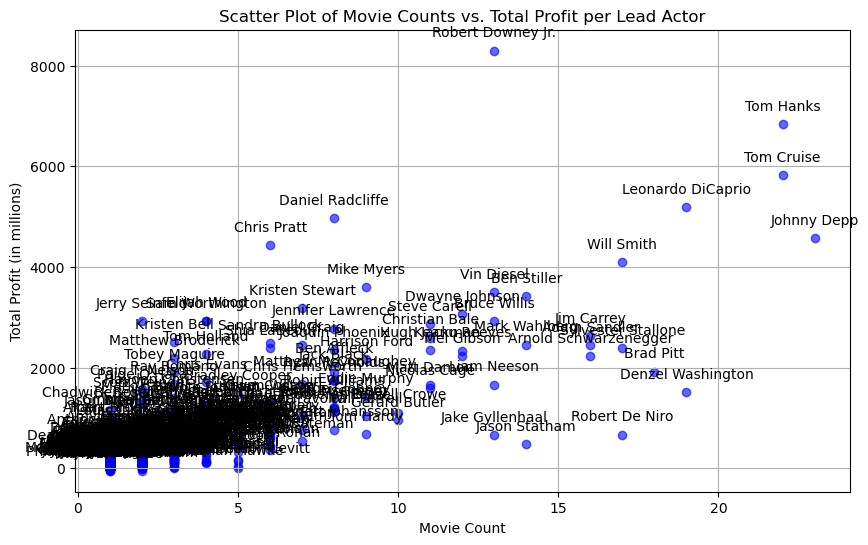

In [18]:
profit_per_actor = Actors_df.groupby('Lead actor')['profit'].sum()

# Merge the counts and profits into a single DataFrame
actors_stats = pd.DataFrame({
    'Movie Count': actors_most_movies,
    'Total Profit': profit_per_actor
}).reset_index()

# Rename columns for clarity
actors_stats.rename(columns={'index': 'Lead Actor'}, inplace=True)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actors_stats['Movie Count'], actors_stats['Total Profit'] / 1_000_000, color='blue', alpha=0.6)

# Label the axes
plt.xlabel('Movie Count')
plt.ylabel('Total Profit (in millions)')
plt.title('Scatter Plot of Movie Counts vs. Total Profit per Lead Actor')

# Annotate points with actor names
for i in range(len(actors_stats)):
    plt.annotate(actors_stats['Lead actor'][i], 
                 (actors_stats['Movie Count'][i], actors_stats['Total Profit'][i] / 1_000_000),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

# Show the plot
plt.grid(True)
plt.show()

### analysis

this scatter plot shows the relationship between popularity and profit Per actor. most of the actors fall on the 0-5 movie counts. robert de niro and denzel washington have high movie counts but they did not make as much profit per movie as will smith who is in the same popularity range. 

Awards Analysis